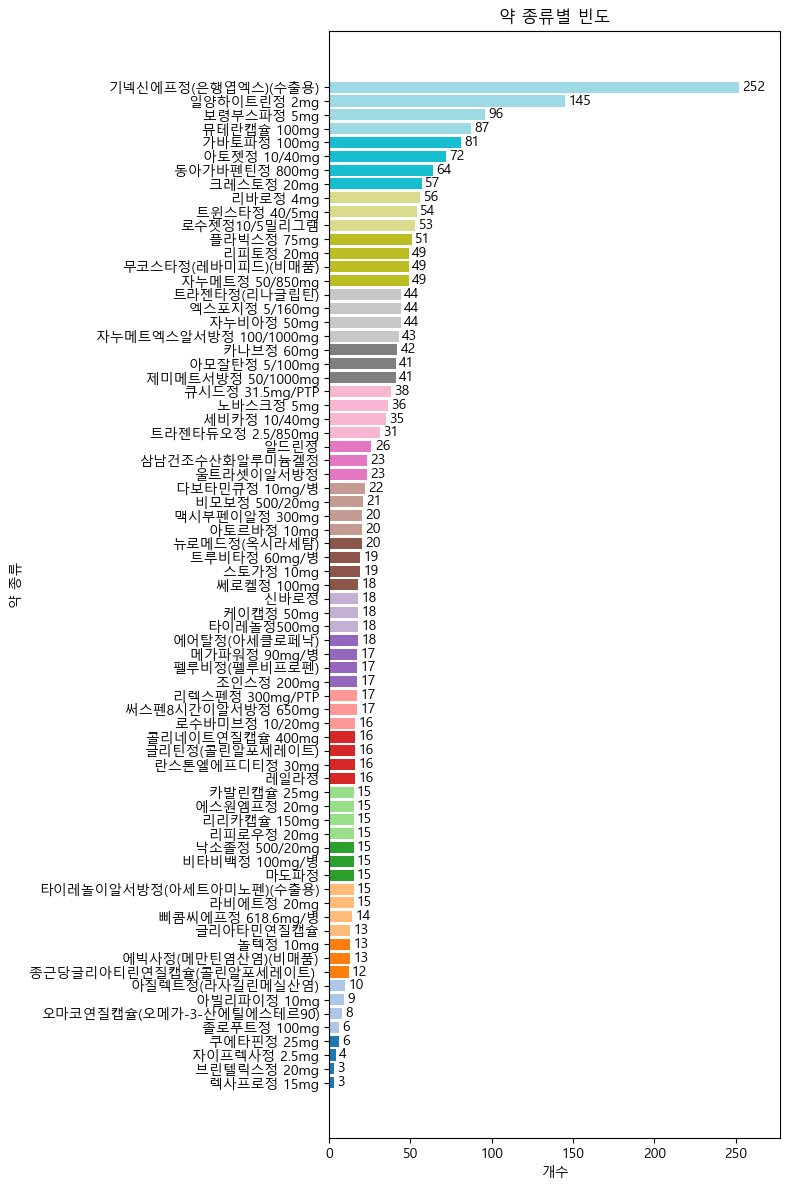

In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# 데이터 로드
df = pd.read_csv('excluded_annotations.csv')
mapping_df = pd.read_csv('category_id_name_mapping.csv')

# 집계 및 매핑
counts = df['categories_id'].value_counts().sort_index()
counts_df = counts.reset_index()
counts_df.columns = ['categories_id', 'count']
counts_df = counts_df.merge(mapping_df, on='categories_id', how='left')
counts_df = counts_df.sort_values('count', ascending=True)

# 색상
colors = plt.cm.tab20(np.linspace(0, 1, len(counts_df)))

# 플롯
fig, ax = plt.subplots(figsize=(8, 12))
bars = ax.barh(counts_df['categories_name'], counts_df['count'], color=colors)

# 라벨 붙이기
for bar in bars:
    w = bar.get_width()
    ax.text(w + 2,                     # 바 길이 + 오프셋
            bar.get_y() + bar.get_height() / 2,
            f'{int(w)}',
            va='center')

# 축 레이블 및 타이틀
max_count = counts_df['count'].max()
ax.set_xlim(0, max_count * 1.1)
ax.set_xlabel('개수')
ax.set_ylabel('약 종류')
ax.set_title('약 종류별 빈도')
plt.tight_layout()
plt.show()
